In [23]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
# import xarray as xr

# Start with Shoreline and Bluff edge

In [63]:
# Read the Shapefile into a GeoDataFrame
gdf_be = gpd.read_file("raw_datasets/gibbs/BarterIsland_BluffEdge_1950to2020.zip")
gdf_sl = gpd.read_file('raw_datasets/gibbs/BarterIsland_Shoreline_1947to2020.zip').to_crs(crs="4326")

In [66]:
gdf_be.crs

<Projected CRS: EPSG:26907>
Name: NAD83 / UTM zone 7N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 144°W and 138°W - onshore and offshore. Canada - British Columbia; Yukon. United States (USA) - Alaska.
- bounds: (-144.0, 52.05, -137.99, 73.59)
Coordinate Operation:
- name: UTM zone 7N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
gdf_be.describe()

,Year_,UNCY
count,491.000000,491.000000
mean,2006.745418,1.291039
std,17.654807,0.957953
min,1950.000000,0.200000
25%,2008.000000,0.500000
50%,2013.000000,1.100000
75%,2016.000000,1.800000
max,2020.000000,5.100000


In [61]:
gdf_be.Date_.unique()

array(['07/13/1979', '09/19/2000', '06/23/2008', '07/01/2014',
       '09/07/2014', '07/05/2015', '08/02/2009', '07/24/1955',
       '08/02/1950', '07/25/1969', '09/18/2004', '07/04/2007',
       '07/13/2006', '09/19/2008', '07/07/1975', '07/15/2011',
       '09/06/2010', '07/25/2010', '08/27/2016', '09/05/2019',
       '07/11/2012', '07/30/2018', '07/13/2017', '08/07/2013',
       '07/10/2020'], dtype=object)

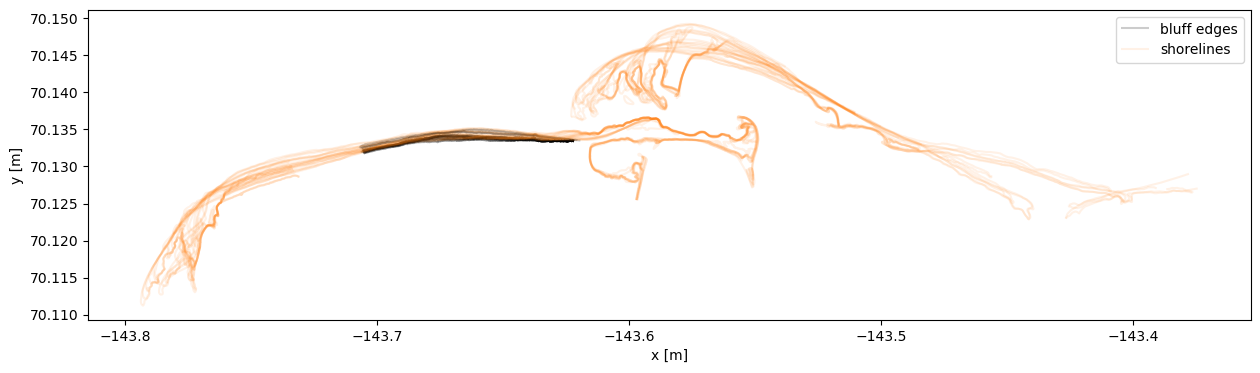

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))

gdf_be.plot(ax=ax, color='black', alpha=0.2, label='bluff edges')
gdf_sl.plot(ax=ax, color='C1', alpha=0.1, label='shorelines')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

plt.legend()

# Secondly, Shoreline and Bluff edge change rate

In [48]:
# Read the Shapefile into a GeoDataFrame
gdf_be_cr = gpd.read_file('raw_datasets/gibbs/BarterIsland_BluffTransect_ChangeRates_1950to2020.zip').to_crs(crs="4326")
gdf_sl_cr = gpd.read_file('raw_datasets/gibbs/BarterIsland_ShoreTransect_ChangeRates_1947to2020.zip').to_crs(crs="4326")

In [49]:
gdf_be_cr.head()

,TransectID,BaselineID,GroupID,TransOrder,Azimuth,ShrCount,TCD,SHAPE_Leng,SCE,NSM,...,LR2,LSE,LCI90,WLR,WR2,WSE,WCI90,Trans_Yrs,Calc_Yrs,geometry
0,3,1,1,1,182.67,25,22.25,299.795447,14.94,-14.94,...,0.91,1.72,0.03,-0.13,0.52,1.45,0.05,T1_19502020,25 dates between 08/02/1950 and 07/10/2020,"LINESTRING (-143.62176 70.13531, -143.62176 70..."
1,4,1,1,2,182.67,25,30.00,300.000000,17.56,-17.56,...,0.93,1.73,0.03,-0.15,0.53,1.62,0.05,T2_19502020,25 dates between 08/02/1950 and 07/10/2020,"LINESTRING (-143.62197 70.13531, -143.62197 70..."
2,5,1,1,3,182.67,25,40.00,300.000000,19.26,-19.26,...,0.95,1.40,0.02,-0.15,0.52,1.59,0.05,T3_19502020,25 dates between 08/02/1950 and 07/10/2020,"LINESTRING (-143.62223 70.13531, -143.62223 70..."
3,6,1,1,4,182.67,25,50.00,300.000000,20.61,-20.60,...,0.95,1.52,0.03,-0.14,0.47,1.69,0.05,T4_19502020,25 dates between 08/02/1950 and 07/10/2020,"LINESTRING (-143.62250 70.13531, -143.62250 70..."
4,7,1,1,5,182.67,25,60.00,300.000000,23.43,-23.43,...,0.94,1.89,0.03,-0.19,0.54,1.93,0.06,T5_19502020,25 dates between 08/02/1950 and 07/10/2020,"LINESTRING (-143.62276 70.13532, -143.62276 70..."


In [50]:
gdf_be_cr.describe()

,TransectID,BaselineID,GroupID,TransOrder,Azimuth,ShrCount,TCD,SHAPE_Leng,SCE,NSM,EPR,EPRunc,LRR,LR2,LSE,LCI90,WLR,WR2,WSE,WCI90
count,10675.000000,10675.0,10675.0,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.00000,10675.000000,10675.000000,10675.000000,10675.000000
mean,164.243747,1.0,1.0,162.243747,179.305341,3.331616,1632.444426,299.999387,10.038538,-10.000535,-2.971475,2.051954,-9090.587303,-9090.343843,-9089.934448,-9090.40097,-9090.624319,-9090.348480,-9089.832674,-9090.396041
std,93.388260,0.0,0.0,93.388260,4.653289,4.930718,933.870594,0.011183,22.889266,22.881358,5.252788,3.486209,2873.528072,2874.298176,2875.593421,2874.11747,2873.411002,2874.283508,2875.915902,2874.133059
min,3.000000,1.0,1.0,1.000000,172.510000,2.000000,22.250000,299.795447,0.000000,-163.070000,-78.220000,0.050000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,83.000000,1.0,1.0,81.000000,172.510000,2.000000,820.000000,300.000000,0.490000,-7.505000,-3.270000,0.840000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,164.000000,1.0,1.0,162.000000,182.670000,2.000000,1630.000000,300.000000,2.390000,-2.370000,-1.460000,1.310000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,245.000000,1.0,1.0,243.000000,182.670000,2.000000,2440.000000,300.000000,7.555000,-0.485000,-0.410000,1.930000,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
max,328.000000,1.0,1.0,326.000000,182.670000,25.000000,3270.000000,300.000000,163.070000,23.900000,2.880000,19.900000,0.420000,1.000000,21.010000,1.00000,0.350000,1.000000,37.140000,1.180000


In [51]:
len(gdf_be_cr.TransectID.unique())

326

In [52]:
gdf_sl_cr.describe()

,TransectID,BaselineID,GroupID,TransOrder,Azimuth,ShrCount,TCD,SHAPE_Leng,SCE,NSM,EPR,EPRunc,LRR,LR2,LSE,LCI90,WLR,WR2,WSE,WCI90
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,955.869085,2.062566,2.062566,958.410095,177.264642,4.148265,10441.940478,893.096812,-2953.856872,-3139.856346,-3086.655873,-3085.757387,-3086.492844,-3085.419937,-3064.979826,-3085.202387,-3086.591004,-3085.437587,-3082.483980,-3084.896320
std,553.086449,1.061882,1.061882,554.383733,30.367089,2.772279,13808.883627,197.999696,4709.773082,4587.411000,4619.508641,4620.108453,4619.617559,4620.333977,4634.035071,4620.479406,4619.552295,4620.322180,4622.296916,4620.683978
min,1.000000,1.000000,1.000000,2.000000,112.560000,0.000000,0.000000,230.188485,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,476.250000,1.000000,1.000000,477.250000,163.047500,0.000000,0.000000,800.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,957.500000,2.000000,2.000000,957.500000,182.270000,6.000000,3645.000000,1000.000000,105.530000,-203.950000,-2.795000,0.230000,-2.350000,0.715000,14.380000,0.490000,-2.910000,0.675000,2.380000,0.710000
75%,1434.750000,3.000000,3.000000,1439.750000,204.440000,6.000000,17541.530000,1000.000000,214.492500,-1.272500,-0.020000,0.230000,0.020000,0.910000,36.160000,1.230000,-0.142500,0.850000,6.317500,1.880000
max,1914.000000,4.000000,4.000000,1915.000000,204.440000,6.000000,37955.320000,1500.000004,886.980000,872.440000,11.960000,0.230000,11.900000,0.980000,174.570000,5.950000,13.130000,0.980000,27.240000,8.090000


In [53]:
len(gdf_sl_cr.TransectID.unique())

1902

<Axes: >

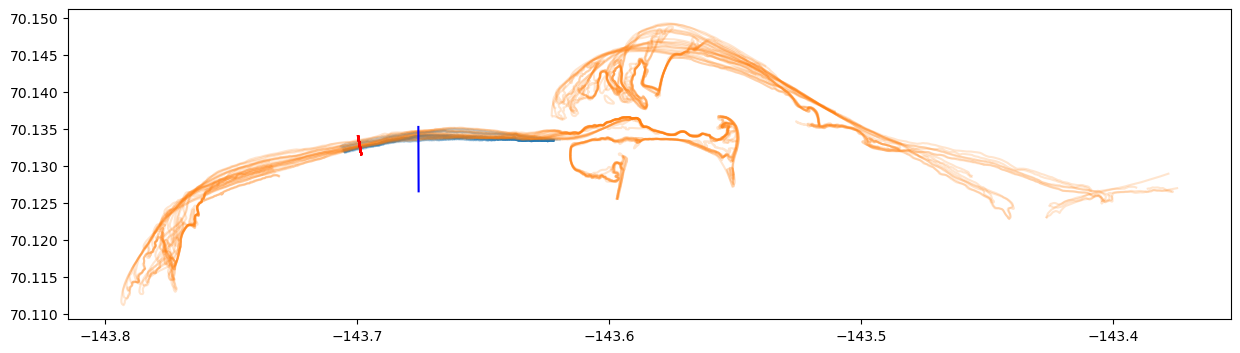

In [54]:
transect_id = 300

fig, ax = plt.subplots(figsize=(15, 5))

gdf_be.plot(ax=ax, color='C0', alpha=0.2)
gdf_sl.plot(ax=ax, color='C1', alpha=0.2)

gdf_be_cr[gdf_be_cr.TransectID==transect_id].plot(ax=ax, color='red')
gdf_sl_cr[gdf_sl_cr.TransectID==transect_id].plot(ax=ax, color='blue')

# Finally, Shoreline and Bluff edge baseline

In [55]:
# Read the Shapefile into a GeoDataFrame
gdf_be_bl = gpd.read_file('raw_datasets/gibbs//BarterIsland_BluffEdgeBaseline.zip').to_crs(crs="4326")
gdf_sl_bl = gpd.read_file('raw_datasets/gibbs//BarterIsland_ShorelineBaseline.zip').to_crs(crs="4326")

In [56]:
gdf_be_bl.head()

,ID,Shape_Leng,geometry
0,1,3276.912651,"LINESTRING (-143.62118 70.13531, -143.67689 70..."


In [57]:
gdf_be_bl.describe()

,ID,Shape_Leng
count,1.0,1.000000
mean,1.0,3276.912651
std,NaN,NaN
min,1.0,3276.912651
25%,1.0,3276.912651
50%,1.0,3276.912651
75%,1.0,3276.912651
max,1.0,3276.912651


In [58]:
gdf_sl_bl.describe()

,OBJECTID,ID,DSAS_searc,Shape_Leng
count,4.000000,4.000000,4.00000,4.000000
mean,2.500000,2.500000,950.00000,4785.716160
std,1.290994,1.290994,420.31734,4079.044663
min,1.000000,1.000000,500.00000,1255.014455
25%,1.750000,1.750000,725.00000,1299.852158
50%,2.500000,2.500000,900.00000,4466.867749
75%,3.250000,3.250000,1125.00000,7952.731751
max,4.000000,4.000000,1500.00000,8954.114687


<Axes: >

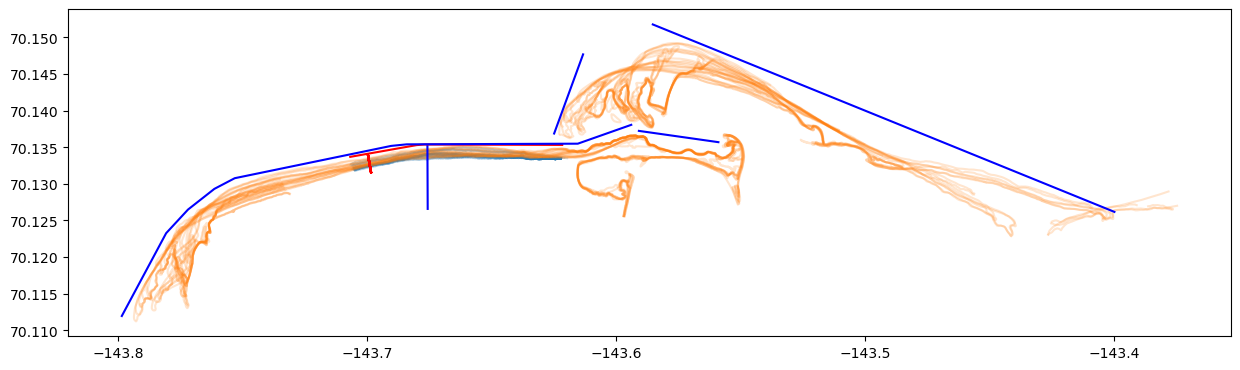

In [60]:
transect_id = 300

fig, ax = plt.subplots(figsize=(15, 5))

gdf_be.plot(ax=ax, color='C0', alpha=0.2)
gdf_sl.plot(ax=ax, color='C1', alpha=0.2)

gdf_be_cr[gdf_be_cr.TransectID==transect_id].plot(ax=ax, color='red')
gdf_sl_cr[gdf_sl_cr.TransectID==transect_id].plot(ax=ax, color='blue')

gdf_be_bl.plot(ax=ax, color='red')
gdf_sl_bl.plot(ax=ax, color='blue')